# Morgan & Morgan Business Analyst Evaluation

In this notebook you will find insights and analysis on revenue, profit, expenses, and employee performance.This analysis will look into how each department and office is performing, within the past three years and find that 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
settle= pd.read_excel('settlement.xlsx')
emp=pd.read_excel('employee.xlsx')

## 1. Department's total revenue and average fee in 2019, 2020 & 2021

In [3]:
growth=pd.merge(emp,settle,left_on='Employee ID',right_on='Handling Attorney: Employee ID')\
[['Resolution Date','Case Expenses','Settlement Amount','Department','Office']]

In [4]:
growth=pd.merge(emp,settle,left_on='Employee ID',right_on='Handling Attorney: Employee ID')[['Resolution Date','Case Expenses','Settlement Amount','Department','Office']]
growth['month_year']=pd.DatetimeIndex(pd.to_datetime(growth['Resolution Date'],format='%Y%m%d')).to_period('M').to_timestamp()
growth['year']=pd.DatetimeIndex(pd.to_datetime(growth['Resolution Date'],format='%Y%m%d')).year
growth['profit']=growth['Settlement Amount']-growth['Case Expenses']

### Total Revenue 

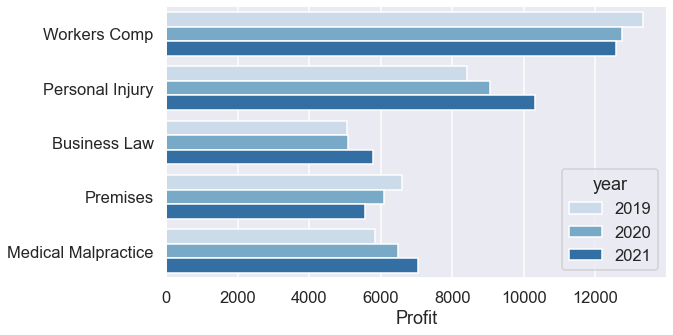

In [5]:
sns.set('talk')
ax=sns.catplot(
    y='Department',x='profit',hue='year',data=growth,kind='bar',ci=None,dodge = True,
    aspect=2,palette="Blues", legend_out=False)\
    .set(xlabel='Profit',ylabel='')
plt.savefig('yavgtot',transparent=True)

When it comes to average revenue, Overall 'Worker's Comp" has brought the biggest revenue of over 12000k for all three years. Although its seen that revenue has decreased over the following years. 

### Average Fee

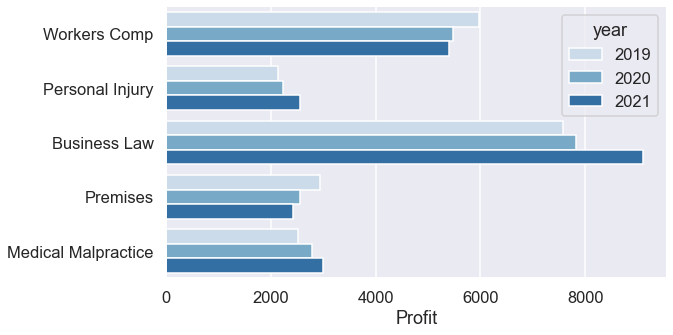

In [6]:
sns.set('talk')
ax=sns.catplot(
    y='Department',x='Case Expenses',ci=None,hue='year',data=growth,
    kind='bar',dodge = True,aspect=2,palette="Blues", legend_out=False)\
    .set( xlabel='Profit',ylabel='')
plt.savefig('yavgex',transparent=True)

## 2. Office's year-over-year growth in revenue.

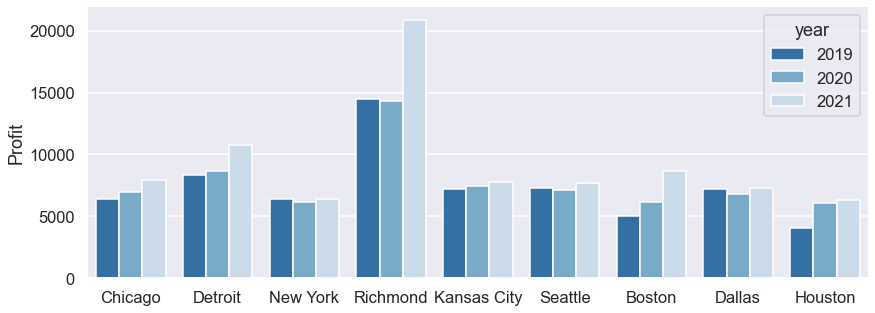

In [7]:
sns.set('talk')
ax=sns.catplot(
    x='Office',y='profit',hue='year',data=growth,dodge = True,ci=None,kind='bar',
    aspect=2.5,palette="Blues_r", legend_out=False)\
    .set( ylabel='Profit',xlabel='')
plt.savefig('yrovyr',transparent=True)

## 3. Detailed analysis of which departments or offices the firm should expand or scale back.

### Departments

In [8]:
exp_scale=pd.merge(emp,settle,left_on='Employee ID',right_on='Handling Attorney: Employee ID')\
[['Hire Date','Resolution Date','Handling Attorney Name',"Office","Department",'Settlement Amount','Case Expenses','Case Number']]

In [9]:
exp_scale['profit']=exp_scale['Settlement Amount']-exp_scale['Case Expenses']
exp_scale['month_year']=pd.DatetimeIndex(pd.to_datetime(exp_scale['Resolution Date'],format='%Y%m%d')).to_period('M').to_timestamp()
exp_scale['year']=pd.DatetimeIndex(pd.to_datetime(exp_scale['Resolution Date'],format='%Y%m%d')).year


In [10]:
dep_scale=exp_scale.loc[
    [i for i in exp_scale.index if exp_scale.Department[i] in ['Workers Comp','Premises','Medical Malpractice']]
    ]

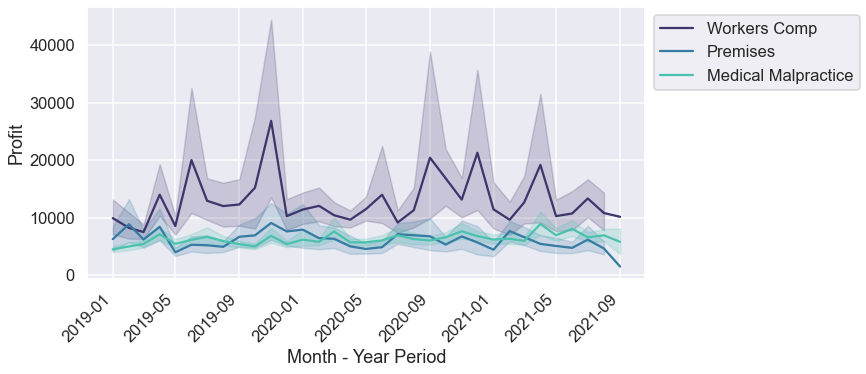

In [11]:
palette = sns.color_palette("mako", 3)
plt.figure(figsize=(10,5))
sns.lineplot(x='month_year',y='profit', hue='Department', data= dep_scale,palette=palette,)
plt.xlabel('Month - Year Period')
plt.ylabel('Profit')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.savefig('mthrev',transparent=True, bbox_inches='tight')

### Offices

In [12]:
of_dist=growth[growth['Settlement Amount']<100000]

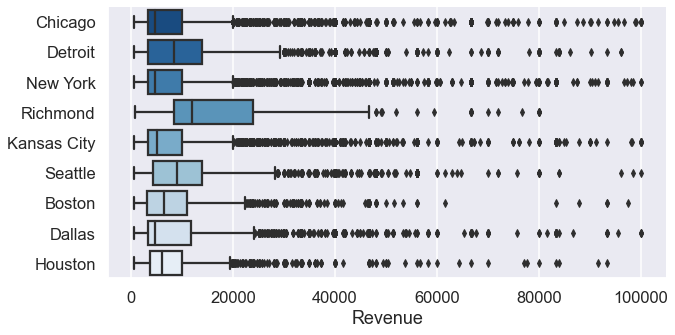

In [13]:
ax=sns.catplot(
    y='Office',x='Settlement Amount',data=of_dist,dodge = True,kind='box',aspect=2,
    palette="Blues_r", legend_out=False)
plt.xlabel('Revenue')
plt.ylabel('')
plt.title('')
plt.savefig('dens_rev',transparent=True, bbox_inches='tight')

In [14]:
of_scale=exp_scale.loc[
    [i for i in exp_scale.index if exp_scale.Office[i] in ["Richmond", "Houston", "New York", "Chicago"]]
    ]

In [15]:
of_scale=of_scale.sort_values('month_year')
xticks=[str(i)[:7]for i in list(set(of_scale.month_year))]
xticks.sort()

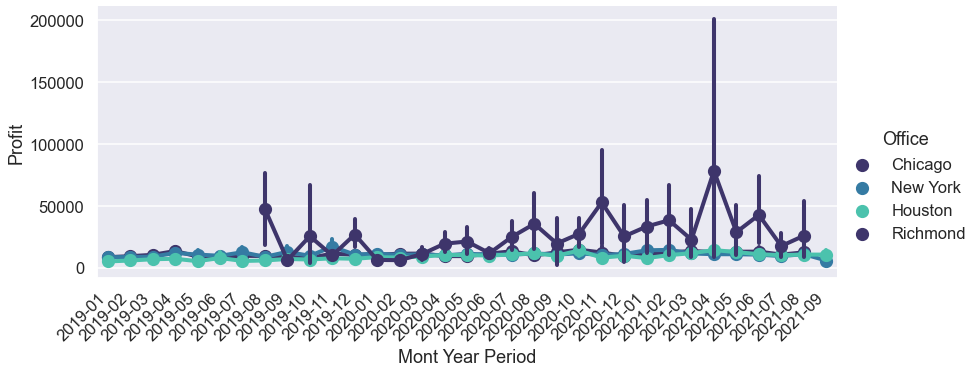

In [16]:
sns.catplot(
    x='month_year',y='Settlement Amount', hue='Office', aspect=2.5,kind='point',
    palette=palette,data= of_scale)
locs, labels=plt.xticks()
plt.xticks(locs,xticks, rotation=45, horizontalalignment='right')
plt.xlabel('Mont Year Period')
plt.ylabel('Profit')
plt.savefig('off_prof',transparent=True, bbox_inches='tight')
plt.show()

## 4. Attorneys that should be put on a PIP

In [17]:
performance=pd.merge(emp,settle,left_on='Employee ID',right_on='Handling Attorney: Employee ID')\
[['Hire Date','Handling Attorney Name','Settlement Amount','Case Expenses']]

In [18]:
performance['Collection Rate']=round(performance['Settlement Amount']/performance['Case Expenses'],2)
performance['profit']=round(performance['Settlement Amount']-performance['Case Expenses'],2)

In [19]:
performance['Expense percent']=round((performance['Case Expenses']*100)/performance['Settlement Amount'])
performance['years working']=2021-pd.DatetimeIndex(pd.to_datetime(performance['Hire Date'],format='%Y%m%d')).year
low_perf=performance.groupby('Handling Attorney Name').mean().reset_index().sort_values(by=['Collection Rate']).head(10)
low_perf.profit=pd.to_numeric(round(low_perf['profit']), downcast='integer')

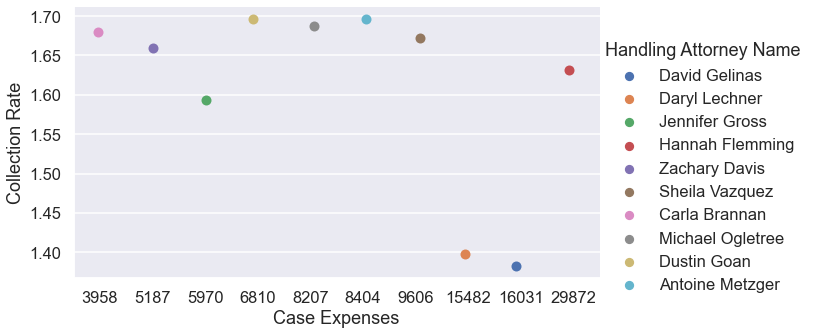

In [20]:
sns.catplot(data=low_perf, x="Case Expenses", y="Collection Rate",s=10,aspect=1.8,hue="Handling Attorney Name")
locs, labels=plt.xticks()
xticks=[round(float(str(l)[12:-2]))for l in labels]
plt.xticks(locs,xticks)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

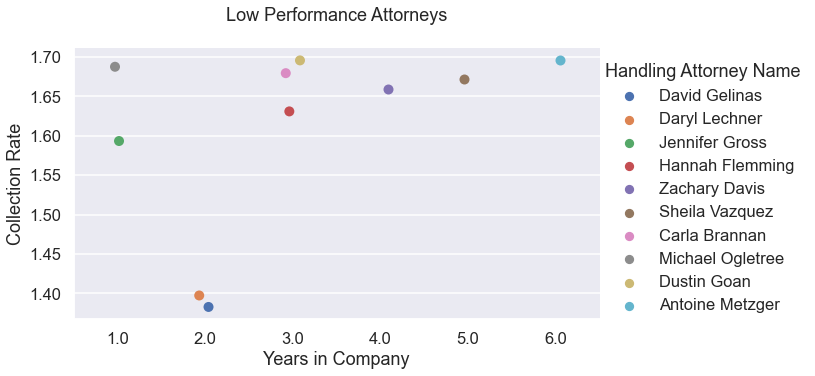

In [21]:
ax=sns.catplot(
    x='years working',y='Collection Rate',hue='Handling Attorney Name',s=10, aspect=1.8,
    data=low_perf,legend_out=True)
plt.xlabel('Years in Company')
plt.title('Low Performance Attorneys''\n')
plt.show